Connected to base (Python 3.10.13)

In [1]:
# Importing required library for plotting
import matplotlib.pyplot as plt


# Function definitions from the PDF document with corrections and enhancements
def unipolar(inp):
    inp1 = list(inp)
    inp1.insert(0, 0)
    return inp1


def polar_nrz_l(inp):
    inp1 = list(inp)
    inp1.insert(0, 0)
    inp1 = [-1 if i == 0 else 1 for i in inp1]
    return inp1


def polar_nrz_i(inp):
    inp2 = list(inp)
    lock = False
    for i in range(len(inp2)):
        if inp2[i] == 1 and not lock:
            lock = True
            continue
        if lock and inp2[i] == 1:
            if inp2[i - 1] == 0:
                inp2[i] = 1
                continue
            else:
                inp2[i] = 0
                continue
        if lock:
            inp2[i] = inp2[i - 1]
    inp2 = [-1 if i == 0 else 1 for i in inp2]
    return inp2


def polar_rz(inp):
    inp1 = list(inp)
    inp1 = [-1 if i == 0 else 1 for i in inp1]
    li = []
    for i in range(len(inp1)):
        li.append(inp1[i])
        li.append(0)
    return li


def Biphase_manchester(inp):
    inp1 = list(inp)
    li = []
    init = False
    for i in range(len(inp1)):
        if inp1[i] == 0:
            li.append(-1)
            if not init:
                li.append(-1)
                init = True
            li.append(1)
        elif inp1[i] == 1:
            li.append(1)
            li.append(-1)
    return li


def Differential_manchester(inp):
    inp1 = list(inp)
    li = []
    lock = False
    pre = ""
    for i in range(len(inp1)):
        if inp1[i] == 0 and not lock:
            li.append(-1)
            li.append(-1)
            li.append(1)
            lock = True
            pre = "S"
        elif inp1[i] == 1 and not lock:
            li.append(1)
            li.append(1)
            li.append(-1)
            lock = True
            pre = "Z"
        else:
            if inp1[i] == 0:
                if pre == "S":
                    li.append(-1)
                    li.append(1)
                else:
                    li.append(1)
                    li.append(-1)
            else:
                if pre == "Z":
                    pre = "S"
                    li.append(-1)
                    li.append(1)
                else:
                    pre = "Z"
                    li.append(1)
                    li.append(-1)
    return li


def AMI(inp):
    inp1 = list(inp)
    inp1.insert(0, 0)
    lock = False
    for i in range(len(inp1)):
        if inp1[i] == 1 and not lock:
            lock = True
            continue
        elif lock and inp1[i] == 1:
            inp1[i] = -1
            lock = False
    return inp1


# Implementing 2B1Q and HDB3 encoding as per the enhancement request
def two_b_one_q(inp):
    voltage_map = {"00": -3, "01": -1, "11": 1, "10": 3}
    encoded = []
    if len(inp) % 2 != 0:
        inp.append(0)
    for i in range(0, len(inp), 2):
        bit_pair = f"{inp[i]}{inp[i+1]}"
        encoded.append(voltage_map[bit_pair])
    return encoded


def hdb3(inp):
    encoded = []
    zero_count = 0
    last_nonzero = 0
    for bit in inp:
        if bit == 0:
            zero_count += 1
            if zero_count < 4:
                encoded.append(0)
            else:
                if last_nonzero == 0:
                    encoded[-3:] = [0, 0, 1]
                    last_nonzero = 1
                else:
                    encoded[-3:] = [0, 0, -1]
                    last_nonzero = -1
                zero_count = 0
        else:
            if last_nonzero == 1:
                encoded.append(-1)
                last_nonzero = -1
            else:
                encoded.append(1)
                last_nonzero = 1
            zero_count = 0
    return encoded


# Updating the plot function to include 2B1Q and HDB3 encoding plots
def plot(li):
    plt.figure(figsize=(10, 18))  # Adjusted figure size for better visibility

    encodings = [
        unipolar,
        polar_nrz_l,
        polar_nrz_i,
        polar_rz,
        Biphase_manchester,
        Differential_manchester,
        AMI,
        two_b_one_q,
        hdb3,
    ]
    encoding_names = [
        "Unipolar-NRZ",
        "P-NRZ-L",
        "P-NRZ-I",
        "Polar-RZ",
        "B_Man",
        "Dif_Man",
        "A-M-I",
        "2B1Q",
        "HDB3",
    ]

    for i, encoding in enumerate(encodings, start=1):
        plt.subplot(len(encodings), 1, i)  # Adjusted to dynamically fit all encodings
        plt.ylabel(encoding_names[i - 1])
        plt.plot(encoding(li), drawstyle="steps-pre", marker=">")
        if i < len(encodings):
            plt.tick_params(
                axis="x",  # changes apply to the x-axis
                which="both",  # both major and minor ticks are affected
                bottom=False,  # ticks along the bottom edge are off
                top=False,  # ticks along the top edge are off
                labelbottom=False,
            )  # labels along the bottom edge are off

    plt.tight_layout()
    plt.show()

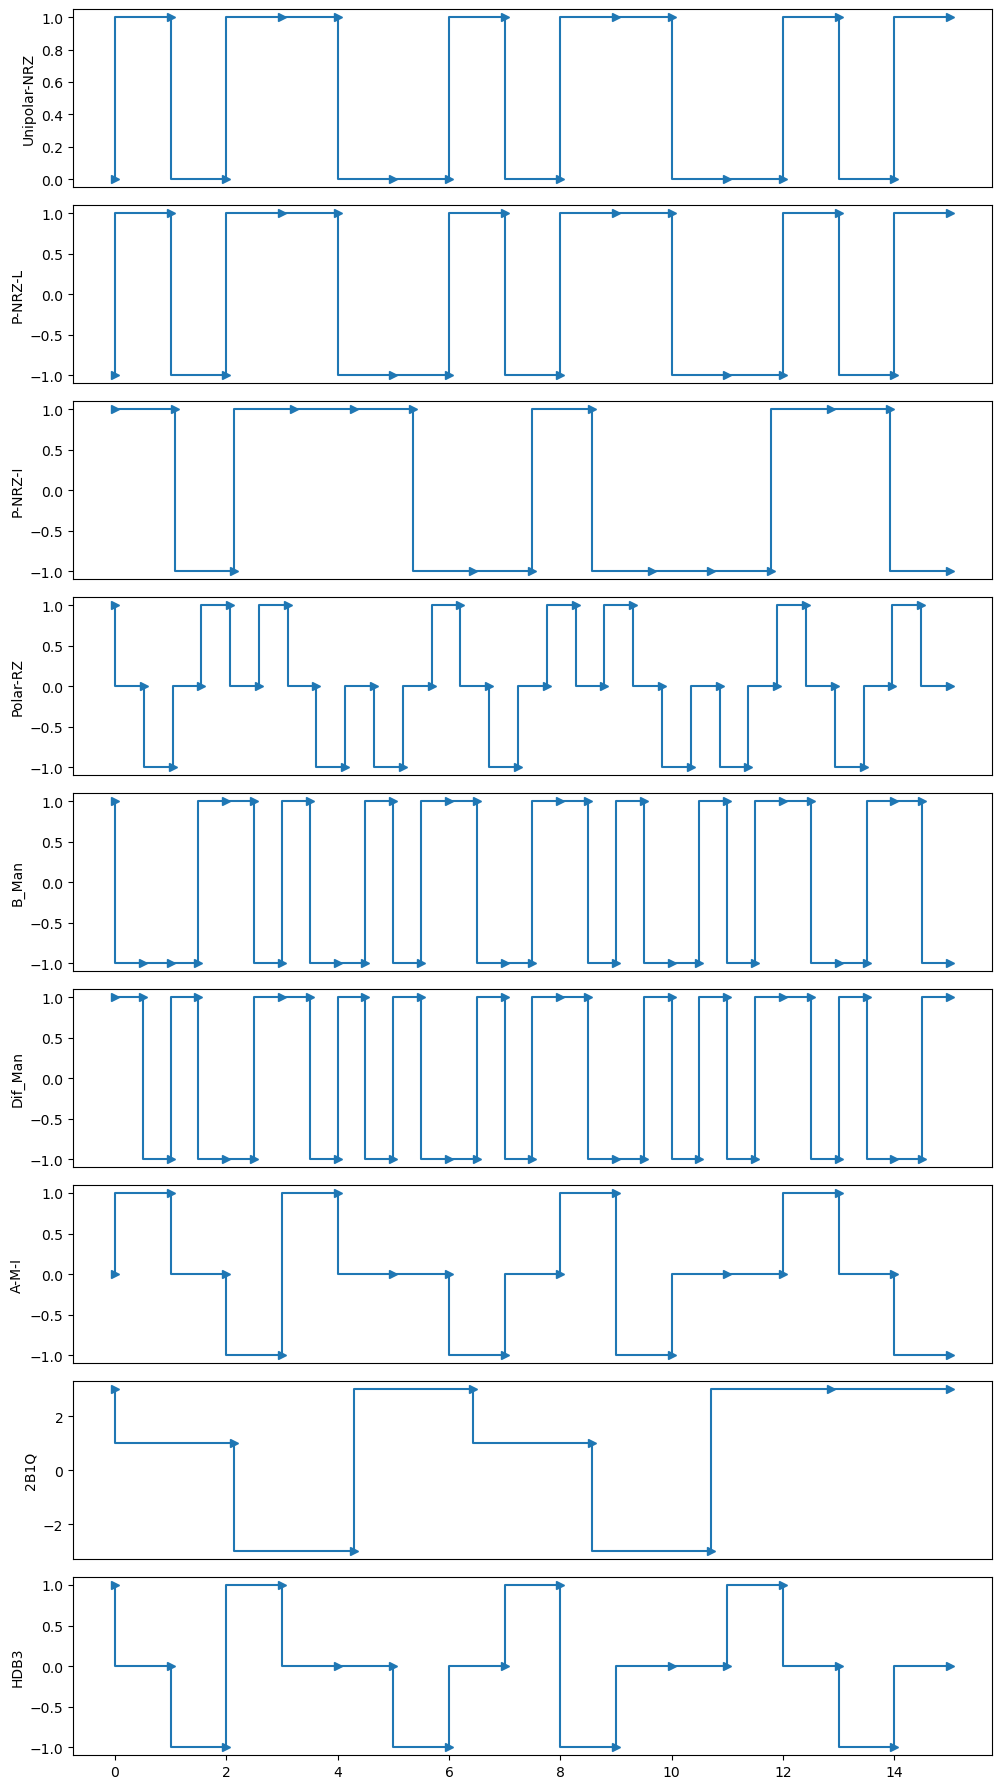

In [2]:
# Note: The main function and input gathering logic are not included here.
# This is to focus on the integration and functionality of the encoding schemes and plotting.

if __name__ == "__main__":
    plot([1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1])